# Stack Overflow

## Introduction 

In the second part of this assignment, you will choose to create and analyze time series of creation dates of Stack Overflow questions, or Stack Overflow answers. You need to choose only one of the two, but please mention clearly what kind of time series you created. This assignment is to be completed **INDIVIDUALLY** and is due on **October 6 at 5pm**.

As stated above, you need to create time series of Stack Overflow questions, or answers using their creation dates. In order to do so you should use the information derived from Homework 1.1. Note that the focus of this homework is not on data collection, but on data analysis and interpretation so do not worry if you did not collect all data in the previous homework.

You are going to analyze users. If you selected to create time series of questions take the top 100 users with the most question posts, while if you created time series of answers take the top 100 users with the highest answer scores. For each user, your time series will be the number of questions (for questions), or the score value (for answers) posted by that user at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at a certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze users asking questions and sample during different hours of the day, your hypothesis could be that some users ask more questions during night hours because they are students, while others are more active during day time because they work in industry.   

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data (your hypothesis), what timeseries you created, what method you chose and why. Providing us with novel, or more than one hypotheses/analyses will give you extra credit. **(20 pts)**

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

My hypothesis is that the top100 users ask more questions in September and January because those are the beginnings of the semester, and students tend to need a lot of help at those times. 

In [2]:
#import libraries
import pandas as pd
import datetime
import matplotlib as mp
import matplotlib.pyplot as plt

#read in data - i know its called answers but it's questions!! sorry
questions = pd.read_csv("answers2.csv")

In [53]:
#find top 100 
top100 = pd.DataFrame()
#aggregate number of questions asked and group by userid
top100 = questions.groupby('OwnerUserId').agg({'OwnerUserId': 'count'})
#rename column to count
top100.columns = ['Count']
#add userid column
top100['OwnerUserId'] = top100.index
#sort descnding
top100 = top100.sort_values(by='Count', ascending=0)
#take top 100 except for 'none' users
top100 = top100[1:101]
#index questions dataframe on top 100 users
top100questions = questions.loc[questions['OwnerUserId'].isin(top100['OwnerUserId'])]

#create dataframe of frequencies of question postings for top 100 question askers
d = {'UserId': [], 'Dates': [], 'Series': []}
k=0
while k<100:
    #find the questions answered by user k
    userseries = top100questions.loc[top100questions['OwnerUserId'] == list(set(list(top100questions['OwnerUserId'])))[k]]
    #set the index to CreationDate and reformat as datetime
    userseries.index = userseries['CreationDate'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f"))
    #append the userid to the dictionary
    d['UserId'].append(set(list(userseries['OwnerUserId'])))
    #only retain OwnerUserId column for resampling
    userseries = userseries['OwnerUserId']
    #resample by month
    userseriescount = userseries.resample('M').count()
    #convert to dataframe
    userseriescount = pd.DataFrame(userseriescount)
    #rename column as count
    userseriescount.columns = ['Count']
    #create date column from index
    userseriescount['CreationDate'] = userseriescount.index
    #append list of dates to dictionary
    d['Dates'].append(list(userseriescount['CreationDate']))
    #append frequency list to dictionary
    d['Series'].append(list(userseriescount['Count']))
    #increment k
    k=k+1

#convert to dataframe
dataframe = pd.DataFrame(d)
#print dataframe
dataframe


,Dates,Series,UserId
0,"[2015-01-31 00:00:00, 2015-02-28 00:00:00, 201...","[5, 8, 11, 11, 6, 38, 3, 14, 15, 28, 16, 31]",{2860931}
1,"[2015-03-31 00:00:00, 2015-04-30 00:00:00, 201...","[24, 15, 26, 16, 22, 20, 7, 23, 21, 6]",{1543374}
2,"[2015-02-28 00:00:00, 2015-03-31 00:00:00, 201...","[1, 12, 15, 12, 13, 15, 27, 5, 16, 41]",{651887}
3,"[2015-01-31 00:00:00, 2015-02-28 00:00:00, 201...","[27, 22, 9, 19, 19, 28, 8, 8, 7, 5, 4, 13]",{719427}
4,"[2015-01-31 00:00:00, 2015-02-28 00:00:00, 201...","[15, 11, 15, 11, 18, 20, 28, 20, 40, 27, 26, 12]",{611750}
5,"[2015-01-31 00:00:00, 2015-02-28 00:00:00, 201...","[34, 14, 20, 9, 15, 18, 17, 12, 15, 28, 40, 40]",{784597}
6,"[2015-01-31 00:00:00, 2015-02-28 00:00:00, 201...","[33, 12, 4, 2, 10, 7, 15, 33, 18, 19, 17, 17]",{1525840}
7,"[2015-04-30 00:00:00, 2015-05-31 00:00:00, 201...","[35, 37, 33, 26, 20, 2, 1, 17, 10]",{4739628}
8,"[2015-01-31 00:00:00, 2015-02-28 00:00:00, 201...","[1, 12, 9, 20, 12, 19, 36, 12, 4, 9, 11, 32]",{1899010}
9,"[2015-01-31 00:00:00, 2015-02-28 00:00:00, 201...","[23, 4, 7, 5, 4, 5, 17, 28, 26, 19, 15, 22]",{441016}


In [54]:
import numpy as np
import sklearn.metrics as metrics
from scipy.spatial.distance import pdist, squareform
from numpy import *
import seaborn as sns; sns.set()

array = pd.DataFrame(list(dataframe['Series']), index = dataframe['UserId'])
array[isnan(array)] = 0
dists = pdist(array)
dists = squareform(dists)
dists = pd.DataFrame(dists, index=dataframe['UserId'])

dataframe['UserId'] = dataframe['UserId'].apply(lambda x: ''.join(str(list(x))))
#find most dissimilar series
dissimseries = dataframe['Series'].loc[dataframe['UserId'].isin(dists[dists.values == dists.values.max()].index)]
#so that we can take the min without comparing the users to themselves, set all entries that are 0 to 999999
dists[dists==0] = 999999
#find most similar series
simseries = dataframe['Series'].loc[dataframe['UserId'].isin(dists[dists.values == dists.values.min()].index)]





Plot the 2 most similar timeseries in one graph, and plot the 2 most different time series in another graph. Label your axes. **(5 pts)**

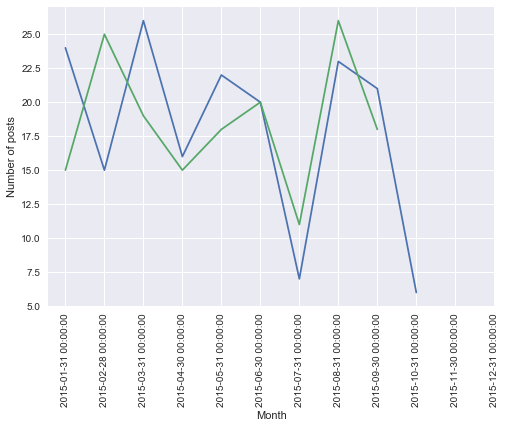

In [55]:
simseries = pd.DataFrame(simseries)
plt.plot(simseries['Series'].iloc[0])
plt.plot(simseries['Series'].iloc[1])
labels = dataframe['Dates'][0]
plt.xticks(range(0, 12, 1), labels, rotation='vertical')
plt.ylabel('Number of posts')
plt.xlabel('Month')
plt.show()

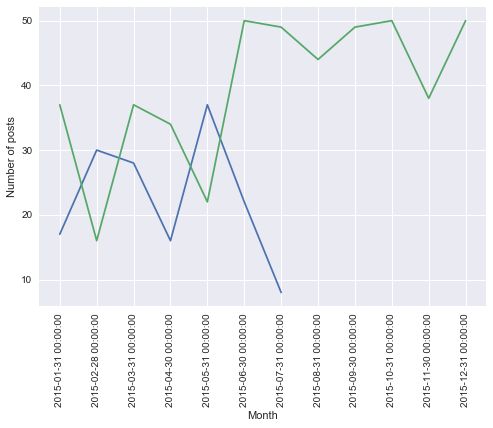

In [56]:
dissimseries = pd.DataFrame(dissimseries)
plt.plot(dissimseries['Series'].iloc[0])
plt.plot(dissimseries['Series'].iloc[1])
labels = dataframe['Dates'][0]
plt.xticks(range(0, 12, 1), labels, rotation='vertical')
plt.ylabel('Number of posts')
plt.xlabel('Month')
plt.show()

What are your interpretation/conclusions from the above plotting comparisons? **(5 pts)**

The similar users actually seem to post more in January and September, just like I stated in my hypothesis, and post the least in July.
The dissimilar users are disimilar in that one users posts skyrocket in the summer, while the other user stops posting altogether. This may be beacuse one user is a student while the other works. The Euclidean distance measures them as very different.

Choose a different distance/similarity metric and repeat the same time series analysis. **(5 pts)**

In [57]:
array2 = pd.DataFrame(list(dataframe['Series']), index = dataframe['UserId'])
array2[isnan(array2)] = 0
dists2 = pdist(array2, metric='correlation')
dists2 = squareform(dists2)
dists2 = pd.DataFrame(dists2, index=dataframe['UserId'])

dataframe['UserId'] = dataframe['UserId'].apply(lambda x: ''.join(str(list(x))))
#find most dissimilar series
dissimseries2 = dataframe['Series'].loc[dataframe['UserId'].isin(dists2[dists2.values == dists2.values.max()].index)]
#so that we can take the min without comparing the users to themselves, set all entries that are 0 to 999999
dists2[dists2==0] = 999999
#find most similar series
simseries2 = dataframe['Series'].loc[dataframe['UserId'].isin(dists2[dists2.values == dists2.values.min()].index)]


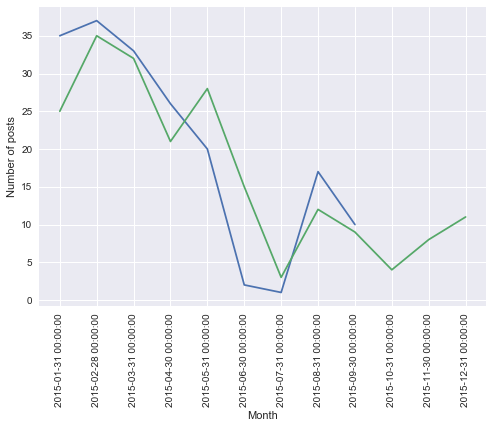

In [58]:
simseries2 = pd.DataFrame(simseries2)
plt.plot(simseries2['Series'].iloc[0])
plt.plot(simseries2['Series'].iloc[1])
labels = dataframe['Dates'][0]
plt.xticks(range(0, 12, 1), labels, rotation='vertical')
plt.ylabel('Number of posts')
plt.xlabel('Month')
plt.show()

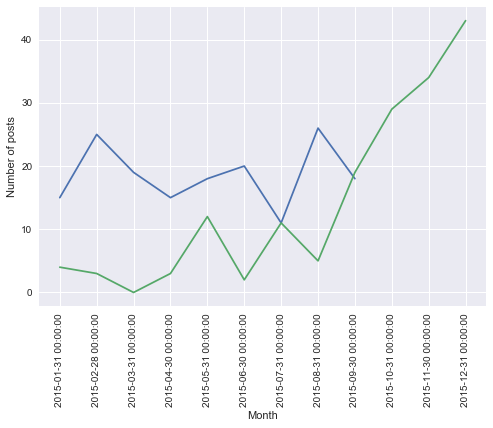

In [59]:
dissimseries2 = pd.DataFrame(dissimseries2)
plt.plot(dissimseries2['Series'].iloc[0])
plt.plot(dissimseries2['Series'].iloc[1])
labels = dataframe['Dates'][0]
plt.xticks(range(0, 12, 1), labels, rotation='vertical')
plt.ylabel('Number of posts')
plt.xlabel('Month')
plt.show()

Compare the two different metrics you used and report any observations. Why did you select the specific metrics? Which do you think performed better based on the results you were expecting and why? **(5 pts)**

For my first metric I used Euclidean distance and for my second I used correlation distance. Correlation distance worked well at finding similar users, but not as well finding dissimilar users. This makes sense - low correlation between users does not necessarily mean that their number of posts were vastly different, just that they changed in different ways that made it hard to predict one from the other. I think Euclidean distance better captures the result I was looking for because it magnifies the dissimilarity between different users better than correlation distance. 
I chose to use Euclidean distance because it seemed like the obvious choice for sequential numeric data. I decided to use correlation distance because I wanted to see if being able to predict one series from the other was a meaningful distance measure. I thought about using DTW, but I couldn't find an implementation that could be used on an mxn array, and upon further thought I realized that it didn't make sense to use DTW on this data since my hypothesis concerned whether certain users post more in January and September - meaning the 'bumps' in the data would not benefit from warping.

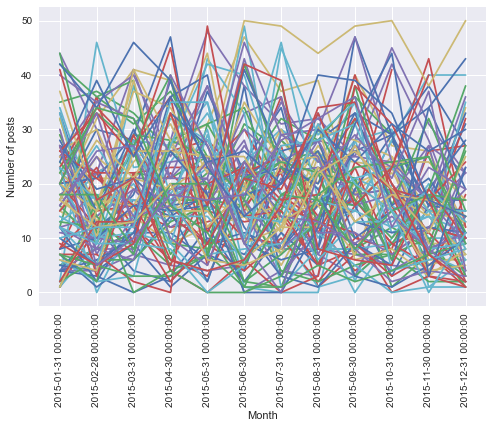

In [61]:
#just for kicks, lets plot all 100 time series
k=0
while k<100:
    plt.plot(dataframe['Series'][k])
    k=k+1
labels = dataframe['Dates'][0]
plt.xticks(range(0, 12, 1), labels, rotation='vertical')
plt.ylabel('Number of posts')
plt.xlabel('Month')
plt.show()
#wow! 